In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',      
    image_size=(150, 150),
    batch_size=16,        
    shuffle=True          
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset/test',
    image_size=(150, 150),
    batch_size=16,        
    shuffle=True          

)
num_classes = len(train_ds.class_names)

Found 1600 files belonging to 2 classes.
Found 376 files belonging to 2 classes.


# getting the data set ( images ) :
- here we get the images from the dataset and groping it in gropes of 16 images with (**batch_size**) , and resize each one to size (150*150) to use it with (**image_size**) , and Arrange them randomly with (**shuffle**)

In [15]:
print(train_ds.class_names) # to get the classes names 

['not_pizza', 'pizza']


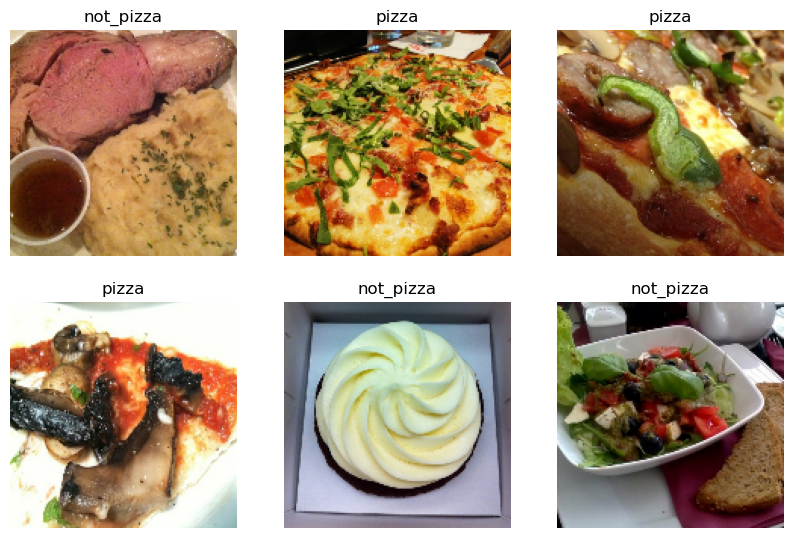

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [17]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# Image Normalization :
- there we change the RGB values in the inmages from the range (0-255) to range (0-1) to facilitating the training process 

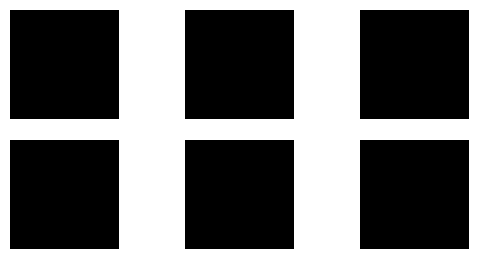

In [18]:
def display_images(ds,num):
    for images, labels in ds.take(1):
        for i in range(num):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            #plt.title(ds.class_names[labels[i]])
            plt.axis("off")
display_images(train_ds,6)

In [22]:
from tensorflow.keras import layers, models

model = Sequential([
    layers.Conv2D(16,(3,3),strides=2,activation='relu',
                  padding='valid',input_shape=(150,150,3)),
    layers.Conv2D(16,(3,3),strides=2,activation='relu',
                  padding='valid'),
    layers.Conv2D(32,(3,3),strides=2,activation='relu',
                  padding='valid'),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [23]:
model.compile(
    optimizer='adam',                     
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']                  
)

In [24]:
history = model.fit(
    train_ds,
    epochs=10             
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.6050 - loss: 0.6665
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6988 - loss: 0.5869
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7394 - loss: 0.5150
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8087 - loss: 0.4230
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8687 - loss: 0.3243
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9044 - loss: 0.2457
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9425 - loss: 0.1419  
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9812 - loss: 0.0721
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9937 - loss: 0.0377
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9844 - loss: 0.0451


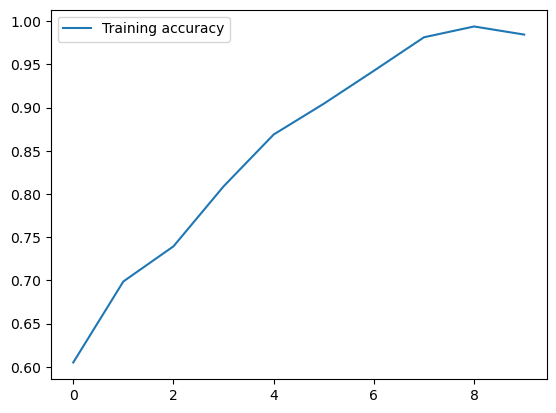

In [26]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.legend()
plt.show()

In [27]:
model.save("my_cnn_model.keras")  # أو "my_cnn_model.h5"


In [28]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Loss on test data: {test_loss:.4f}")
print(f"Accuracy on test data: {test_acc:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6941 - loss: 1.2149  
Loss on test data: 1.2149
Accuracy on test data: 0.6941


In [29]:
history2 = model.fit(
    train_ds,
    epochs=10,  
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9925 - loss: 0.0259
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9925 - loss: 0.0217
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9975 - loss: 0.0130
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 1.0000 - loss: 0.0033
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 1.0000 - loss: 9.8629e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 1.0000 - loss: 6.0524e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 1.0000 - loss: 4.5673e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 1.0000 - loss: 3.5964e-04
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 2.9795e-04
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 1.0000 - loss: 2.5123e-04


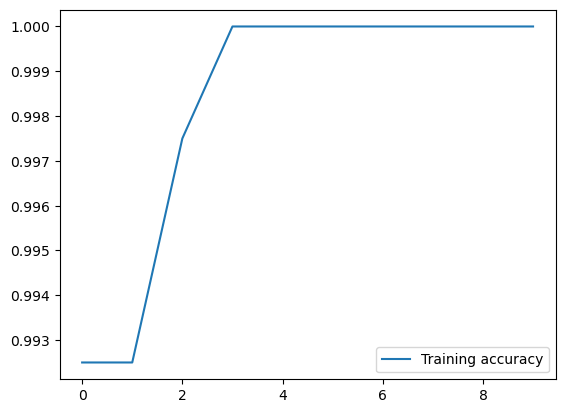

In [31]:
plt.plot(history2.history['accuracy'], label='Training accuracy')
plt.legend()
plt.show()

In [32]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Loss on test data: {test_loss:.4f}")
print(f"Accuracy on test data: {test_acc:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6649 - loss: 1.8282 
Loss on test data: 1.8282
Accuracy on test data: 0.6649
